# Import the necessary modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('50_Startups.csv') #reading the dataset csv file

In [3]:
df.head() #loading the head

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Statistical Analysis

In [4]:
df.info() #getting the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [5]:
df.describe() #generating the statistical distribution

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [7]:
df.shape #checking the shape of the dataframe

(50, 4)

In [8]:
df.isnull().sum() #checking for missing values

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [9]:
df.corr() #checking the correlation for the numeric data in our dataset

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Exploratory Data Analysis

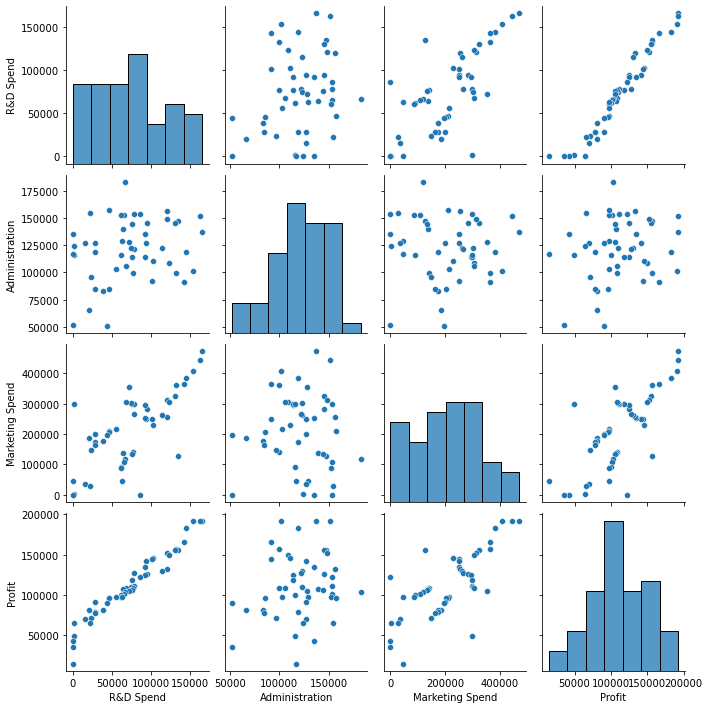

In [10]:
sns.pairplot(df) #plotting a pairplot for the data

We can see that the R&D Spend and the profit have a linear relation. Let's create a jointplot and have a good look at it.

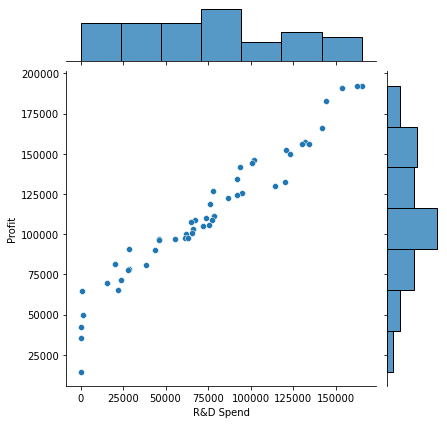

In [11]:
sns.jointplot(x = 'R&D Spend', y = 'Profit', data = df)

<AxesSubplot:>

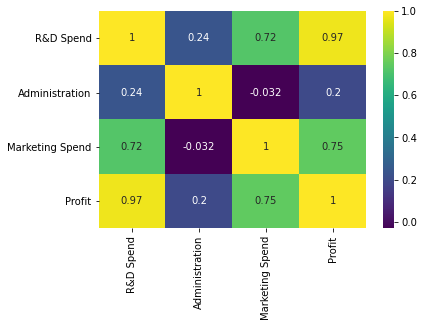

In [12]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis') #creating a heatmap for correlation matrix to see for the trends

# Machine Learning Section

# Train Test Split

In [13]:
#Splitting the data into two variables x and y where x is our feature variable and y is target variable
X = df.drop('Profit', axis = 1)
y = df['Profit']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Multiple Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression() #instantiating the lr model

In [18]:
model.fit(X_train, y_train) #fitting our model on the training data

LinearRegression()

In [19]:
print(model.intercept_) #printing the model intercept

45925.62709663721


In [20]:
print(model.coef_) #printing the model coefficient

[0.7799469  0.0174003  0.03602112]


In [21]:
predictions = model.predict(X_test) #predicting the test data

In [22]:
arr = np.array(y_test) #converting the actual values to a numpy array

In [23]:
arr

array([ 89949.14, 132602.65, 111313.02,  97427.84, 110352.25, 191792.06,
       105733.54,  49490.75,  71498.49,  42559.73])

In [24]:
predictions

array([ 88287.41062646, 151438.84017595, 120537.82823503,  99289.67306481,
       116699.81127514, 191366.93722057, 112014.78869329,  59669.24898719,
        71369.19151394,  48282.09608943])

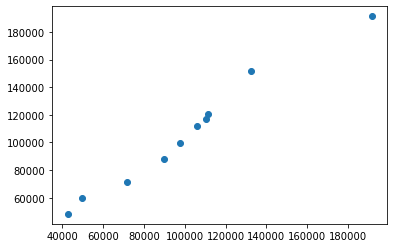

In [25]:
plt.scatter(y_test, predictions) #plotting the actual values vs predicted values

The graph looks quite promising with a linear orientation. 

In [26]:
#creating a dataframe to display the predicted profit values by ml algorithm and the actual values in our dataset
data = pd.DataFrame(data={"Predicted Profit": predictions.flatten(), 'Actual Value':arr.flatten()})

In [27]:
data

,Predicted Profit,Actual Value
0,88287.410626,89949.14
1,151438.840176,132602.65
2,120537.828235,111313.02
3,99289.673065,97427.84
4,116699.811275,110352.25
5,191366.937221,191792.06
6,112014.788693,105733.54
7,59669.248987,49490.75
8,71369.191514,71498.49
9,48282.096089,42559.73


In [28]:
from sklearn import metrics #importing the metrics module from sklearn library

In [29]:
np.mean(arr)

100271.947

In [30]:
print('The regression metrics for LINEAR REGRESSION model are: ')
print('\n')
print('MAE:', metrics.mean_absolute_error(arr, predictions))
print('MSE:', metrics.mean_squared_error(arr, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(arr, predictions)))

The regression metrics for LINEAR REGRESSION model are: 


MAE: 6066.865715986149
MSE: 66241729.62479826
RMSE: 8138.902237083221


# Decision Tree Regression Model

In [31]:
from sklearn.tree import DecisionTreeRegressor #importing the decision tree regressor module from sklearn library

In [32]:
regressor = DecisionTreeRegressor() #instantiating the decision tree regressor model

In [33]:
regressor.fit(X_train, y_train) #fitting the model on our training data

DecisionTreeRegressor()

In [34]:
predictions_reg = regressor.predict(X_test) #predicting the model against the test data 

In [35]:
predictions_reg

array([ 96479.51, 152211.77, 126992.93,  69758.98, 105008.31, 192261.83,
       107404.34,  90708.19,  77798.83,  14681.4 ])

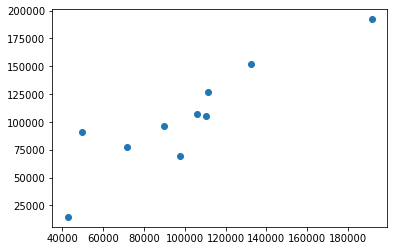

In [36]:
plt.scatter(y_test, predictions_reg) #plotting the actual values vs predicted values

The graph doesn't really have a linear orientation.

In [37]:
#creating a dataframe to display the predicted profit values by ml algorithm and the actual values in our dataset
data_reg = pd.DataFrame(data={"Predicted Profit": predictions_reg.flatten(), 'Actual Value':arr.flatten()})

In [38]:
data_reg

,Predicted Profit,Actual Value
0,96479.51,89949.14
1,152211.77,132602.65
2,126992.93,111313.02
3,69758.98,97427.84
4,105008.31,110352.25
5,192261.83,191792.06
6,107404.34,105733.54
7,90708.19,49490.75
8,77798.83,71498.49
9,14681.40,42559.73


In [39]:
print('MAE:', metrics.mean_absolute_error(arr, predictions_reg))
print('MSE:', metrics.mean_squared_error(arr, predictions_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(arr, predictions_reg)))

MAE: 15236.887999999997
MSE: 398593158.98936
RMSE: 19964.79799520546


# Random Forest Regression Model

In [40]:
from sklearn.ensemble import RandomForestRegressor #importing the Random Forest regressor module from sklearn library

In [41]:
rfr = RandomForestRegressor(n_estimators= 200) #instantiating the random forest regressor model

In [42]:
rfr.fit(X_train, y_train) #fitting the model on our training data

RandomForestRegressor(n_estimators=200)

In [43]:
predictions_rfr = rfr.predict(X_test) #predicting the model against the test data 

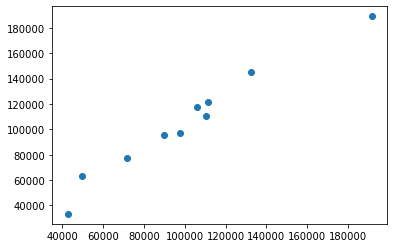

In [44]:
plt.scatter(y_test, predictions_rfr) #plotting the actual values vs predicted values

The graph does have a linear orientation.

In [45]:
#creating a dataframe to display the predicted profit values by ml algorithm and the actual values in our dataset
data_rfr = pd.DataFrame(data={"Predicted Profit": predictions_rfr.flatten(), 'Actual Value':arr.flatten()})

In [46]:
data_rfr

,Predicted Profit,Actual Value
0,95311.31920,89949.14
1,145507.92995,132602.65
2,121712.84275,111313.02
3,97188.16545,97427.84
4,110462.49990,110352.25
5,189139.59510,191792.06
6,117650.99440,105733.54
7,63607.28895,49490.75
8,77256.09070,71498.49
9,33327.09230,42559.73


In [47]:
print('MAE:', metrics.mean_absolute_error(arr, predictions_rfr))
print('MSE:', metrics.mean_squared_error(arr, predictions_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(arr, predictions_rfr)))

MAE: 7269.390300000023
MSE: 77025465.45913474
RMSE: 8776.415296642173


# Support Vector Regression Model

In [48]:
from sklearn.svm import SVR #importing the Support vector machine regressor module from sklearn library

In [49]:
svr = SVR() #instantiating the support vector regressor model

In [50]:
svr.fit(X_train, y_train) #fitting the model on our training data

SVR()

In [51]:
predictions_svr = svr.predict(X_test) #predicting the model against the test data 

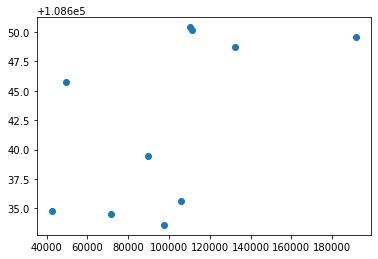

In [52]:
plt.scatter(y_test, predictions_svr) #plotting the actual values vs predicted values

The graph doesn't have any hint of linear orientation.

In [53]:
#creating a dataframe to display the predicted profit values by ml algorithm and the actual values in our dataset
data_rfr = pd.DataFrame(data={"Predicted Profit": predictions_svr.flatten(), 'Actual Value':arr.flatten()})

In [54]:
data_rfr

,Predicted Profit,Actual Value
0,108639.428004,89949.14
1,108648.733685,132602.65
2,108650.146601,111313.02
3,108633.596983,97427.84
4,108650.391750,110352.25
5,108649.592382,191792.06
6,108635.665146,105733.54
7,108645.717265,49490.75
8,108634.533784,71498.49
9,108634.744005,42559.73


In [55]:
print('MAE:', metrics.mean_absolute_error(arr, predictions_svr))
print('MSE:', metrics.mean_squared_error(arr, predictions_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(arr, predictions_svr)))

MAE: 30662.531076895073
MSE: 1722406880.6135666
RMSE: 41501.89008483308


# K Nearest Neighbors Regressor Model

In [56]:
from sklearn.neighbors import KNeighborsRegressor #importing the knn regressor module from sklearn library

In [57]:
knreg = KNeighborsRegressor(n_neighbors = 1) #instantiating the knn regressor model

In [58]:
knreg.fit(X_train, y_train) #fitting the model on our training data

KNeighborsRegressor(n_neighbors=1)

In [59]:
predictions_knn = knreg.predict(X_test) #predicting the model against the test data 

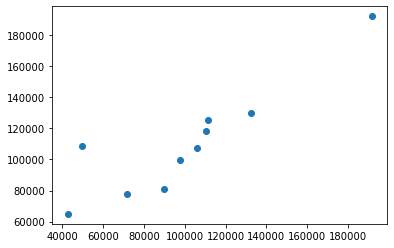

In [60]:
plt.scatter(y_test, predictions_knn) #plotting the actual values vs predicted values

The graph doesn't have an ideal linear orientation.

In [61]:
#creating a dataframe to display the predicted profit values by ml algorithm and the actual values in our dataset
data_knn = pd.DataFrame(data={"Predicted Profit": predictions_knn.flatten(), 'Actual Value':arr.flatten()})

In [62]:
data_knn

,Predicted Profit,Actual Value
0,81229.06,89949.14
1,129917.04,132602.65
2,125370.37,111313.02
3,99937.59,97427.84
4,118474.03,110352.25
5,192261.83,191792.06
6,107404.34,105733.54
7,108733.99,49490.75
8,77798.83,71498.49
9,64926.08,42559.73


In [63]:
print('MAE:', metrics.mean_absolute_error(arr, predictions_knn))
print('MSE:', metrics.mean_squared_error(arr, predictions_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(arr, predictions_knn)))

MAE: 12614.506999999998
MSE: 440584517.93605006
RMSE: 20990.105238803593


In [64]:
#Summary for the regression metrics given by various models
print('The regression metrics for Multiple Linear Regression model are: ')
print('\n')
print('MAE:', metrics.mean_absolute_error(arr, predictions))
print('MSE:', metrics.mean_squared_error(arr, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(arr, predictions)))
print('\n')
print('\n')
print('The regression metrics for Decision Tree Regression model are: ')
print('\n')
print('MAE:', metrics.mean_absolute_error(arr, predictions_reg))
print('MSE:', metrics.mean_squared_error(arr, predictions_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(arr, predictions_reg)))
print('\n')
print('\n')
print('The regression metrics for Random Forest Regression model are: ')
print('\n')
print('MAE:', metrics.mean_absolute_error(arr, predictions_rfr))
print('MSE:', metrics.mean_squared_error(arr, predictions_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(arr, predictions_rfr)))
print('\n')
print('\n')
print('The regression metrics for Support Vector Machine Regression model are: ')
print('\n')
print('MAE:', metrics.mean_absolute_error(arr, predictions_svr))
print('MSE:', metrics.mean_squared_error(arr, predictions_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(arr, predictions_svr)))
print('\n')
print('\n')
print('The regression metrics for K Nearest Neighbors Regression Model are: ')
print('\n')
print('MAE:', metrics.mean_absolute_error(arr, predictions_knn))
print('MSE:', metrics.mean_squared_error(arr, predictions_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(arr, predictions_knn)))





The regression metrics for Multiple Linear Regression model are: 


MAE: 6066.865715986149
MSE: 66241729.62479826
RMSE: 8138.902237083221




The regression metrics for Decision Tree Regression model are: 


MAE: 15236.887999999997
MSE: 398593158.98936
RMSE: 19964.79799520546




The regression metrics for Random Forest Regression model are: 


MAE: 7269.390300000023
MSE: 77025465.45913474
RMSE: 8776.415296642173




The regression metrics for Support Vector Machine Regression model are: 


MAE: 30662.531076895073
MSE: 1722406880.6135666
RMSE: 41501.89008483308




The regression metrics for K Nearest Neighbors Regression Model are: 


MAE: 12614.506999999998
MSE: 440584517.93605006
RMSE: 20990.105238803593


After looking at the various plots for different machine learning models and their regression metrics values, we can say that the best performing model was the linear regression model as it had the lowest values for the regression metrics followed by the decision tree regression model. The order of performance of the various machine learning models are as follows:
1) Multiple Linear Regression Model
2) Random Forest Regression Model
3) Decision Tree Regression Model
4) K Nearest Neighbors Regression Model
5) Support Vector Machine Regression Model